In [46]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 0

plt.rcParams.update({
    "font.family": ["serif"],
    "font.sans-serif": ["Roboto"],
    "font.size": 9,
    "axes.labelsize": 11,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    'figure.figsize': (15.0, 4.0),
    'axes.grid': False,
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'axes.spines.bottom': True,
})

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

In [47]:
dataset = pd.read_csv('full.csv')

BETTER_COLUMN_NAMES = {
    'id_1': 'id_1',
    'id_2': 'id_2',
    'Gender': 'gender',
    'Customer Type': 'customer_type',
    'Age': 'age',
    'Type of Travel': 'type_of_travel',
    'Class': 'ticket_class',
    'Flight Distance': 'flight_distance',
    'Inflight wifi service': 'wifi_service',
    'Departure/Arrival time convenient': 'departure_arrival_time_convenient',
    'Ease of Online booking': 'online_booking',
    'Gate location': 'gate_location',
    'Food and drink': 'food_and_drink',
    'Online boarding': 'online_boarding',
    'Seat comfort': 'seat_comfort',
    'Inflight entertainment': 'inflight_entertainment',
    'On-board service': 'onboard_service',
    'Leg room service': 'leg_room',
    'Baggage handling': 'baggage_handling',
    'Checkin service': 'checkin',
    'Inflight service': 'inflight_service',
    'Cleanliness': 'cleanliness',
    'Departure Delay in Minutes': 'departure_delay',
    'Arrival Delay in Minutes': 'arrival_delay',
    'satisfaction': 'satisfaction',
}

dataset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)
dataset.set_index('id_1', inplace=True)
# dataset

## PUNTO 2.1

<AxesSubplot:>

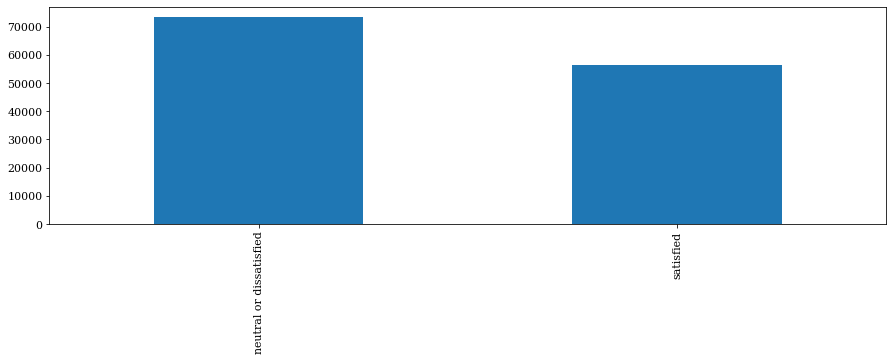

In [48]:
dataset.satisfaction.value_counts().plot.bar()

## PUNTO 2.2

#### Columnas a usar:
    - customer_type
    - ticket_class
    - flight_distance -> GENDER
    - cleanliness
    - arrival_delay -> INFLIHT_SERVICE

### customer_type

<AxesSubplot:>

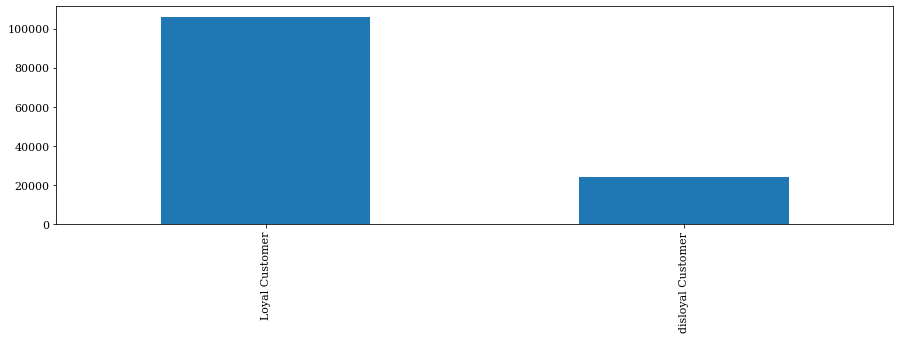

In [49]:
dataset.customer_type.value_counts().plot.bar()

In [50]:
customer_group = dataset.groupby(["customer_type"])

<AxesSubplot:xlabel='customer_type,satisfaction'>

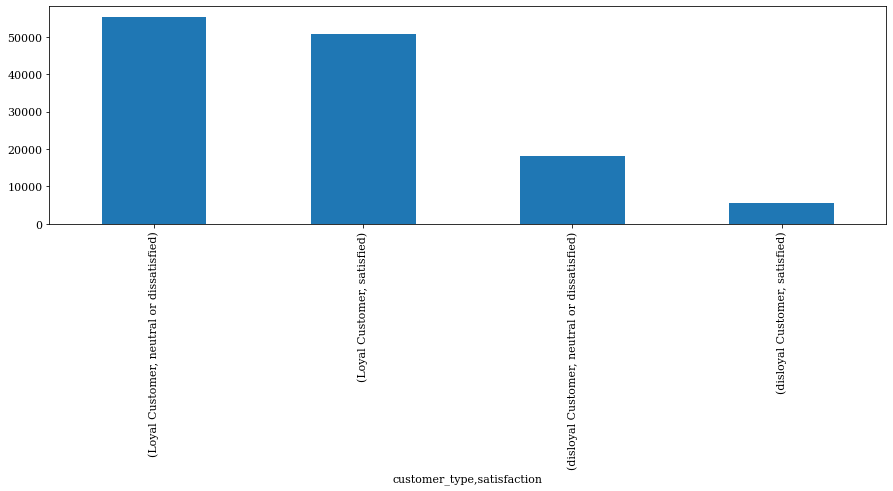

In [51]:
resultados_customer = customer_group["satisfaction"].value_counts()
resultados_customer.plot.bar()

In [52]:
# Celda creada para testear agrupamiento y filtrado
'''
newdataset = dataset[(dataset.customer_type == "disloyal Customer")]
customer_group3 = newdataset.groupby(["customer_type"])
resultados_customer3 = customer_group2["satisfaction"].value_counts()
resultados_customer3.plot.bar()
'''

'\nnewdataset = dataset[(dataset.customer_type == "disloyal Customer")]\ncustomer_group3 = newdataset.groupby(["customer_type"])\nresultados_customer3 = customer_group2["satisfaction"].value_counts()\nresultados_customer3.plot.bar()\n'

In [53]:
satisfied_ppl = dataset[(dataset.customer_type == "Loyal Customer")]
print(satisfied_ppl['satisfaction'].value_counts())


neutral or dissatisfied    55372
satisfied                  50728
Name: satisfaction, dtype: int64


In [54]:
df_disloyal_customers = dataset[(dataset.customer_type == "disloyal Customer")]
print(df_disloyal_customers['satisfaction'].value_counts())


neutral or dissatisfied    18080
satisfied                   5700
Name: satisfaction, dtype: int64


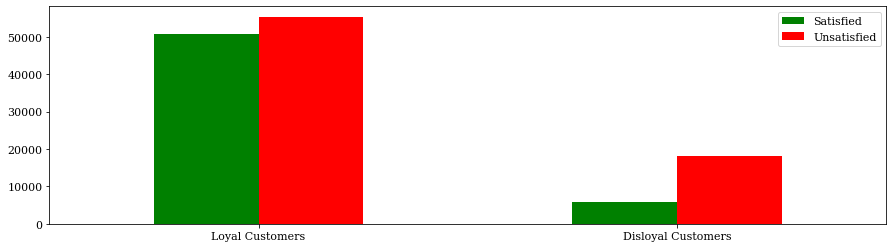

In [55]:
# Celda creada para testear agrupamiento y filtrado
'''
positive_values = [20, 17.5, 40, 1]
negative_values = [15, 8, 70, 4]
index = ['Precision', 'Recall', 'f1-score','babbs']
df = pd.DataFrame({'Positive Values': positive_values,
                    'Negative Values': negative_values}, index=index)
ax = df.plot.bar(rot=0, color={"Positive Values": "green", "Negative Values": "red"})
'''
df_loyal_customers = dataset[(dataset.customer_type == "Loyal Customer")]
df_disloyal_customers = dataset[(dataset.customer_type == "disloyal Customer")]
# print(df_loyal_customers['satisfaction'].value_counts())
# print(df_disloyal_customers['satisfaction'].value_counts())

unsatisfied_loyal_customers = df_loyal_customers['satisfaction'].value_counts()[0]
satisfied_loyal_customers = df_loyal_customers['satisfaction'].value_counts()[1]
unsatisfied_disloyal_customers = df_disloyal_customers['satisfaction'].value_counts()[0]
satisfied_disloyal_customers = df_disloyal_customers['satisfaction'].value_counts()[1]

satisfied_ppl = [satisfied_loyal_customers, satisfied_disloyal_customers]
unsatisfied_ppl = [unsatisfied_loyal_customers, unsatisfied_disloyal_customers]
index = ['Loyal Customers', 'Disloyal Customers']
df = pd.DataFrame({'Satisfied': satisfied_ppl,
                    'Unsatisfied': unsatisfied_ppl}, index=index)
ax = df.plot.bar(rot=0, color={"Satisfied": "green", "Unsatisfied": "red"})

### cleanliness

<AxesSubplot:xlabel='cleanliness,satisfaction'>

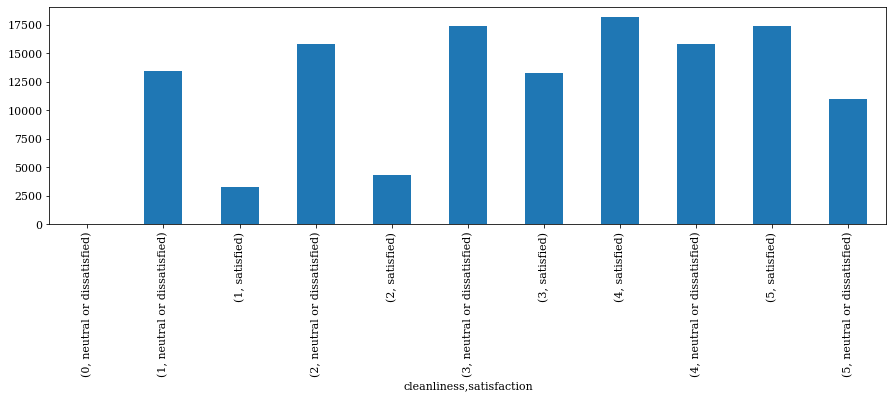

In [57]:
cleanliness_group = dataset.groupby(["cleanliness"])
resultados = cleanliness_group["satisfaction"].value_counts()
resultados.plot.bar()

### ticket_class

<AxesSubplot:>

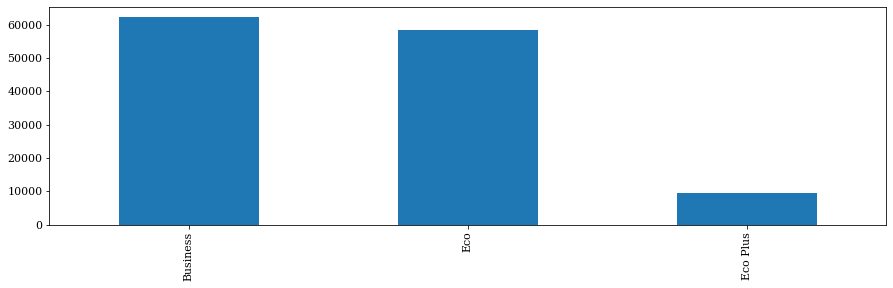

In [58]:
ticket_group = dataset.groupby(["ticket_class"])
dataset.ticket_class.value_counts().plot.bar()

<AxesSubplot:xlabel='ticket_class,satisfaction'>

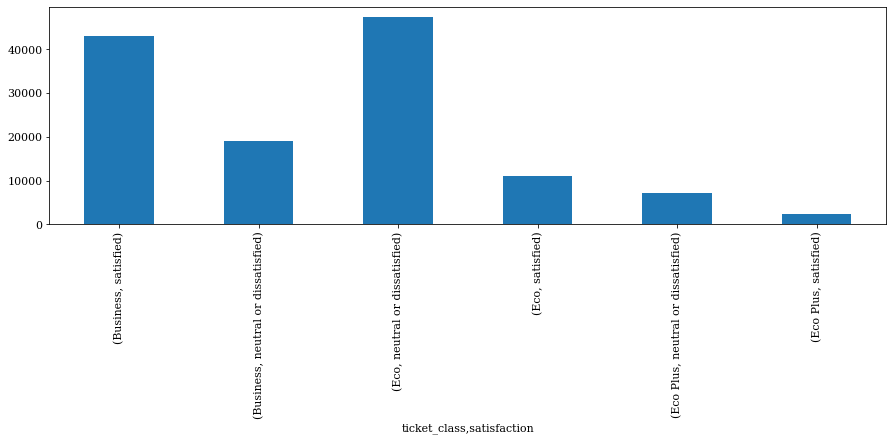

In [59]:
resultados_ticket = ticket_group["satisfaction"].value_counts()
resultados_ticket.plot.bar()

### gender

<AxesSubplot:>

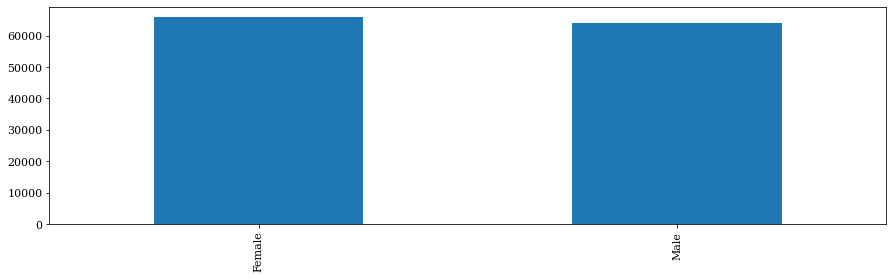

In [60]:
gender_group = dataset.groupby(["gender"])
dataset.gender.value_counts().plot.bar()

<AxesSubplot:xlabel='gender,satisfaction'>

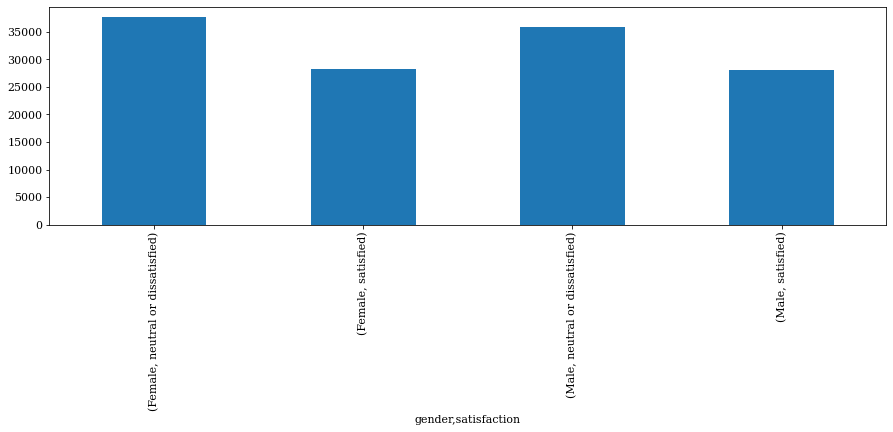

In [61]:
resultados_gender = gender_group["satisfaction"].value_counts()
resultados_gender.plot.bar()

### inflight_service

<AxesSubplot:>

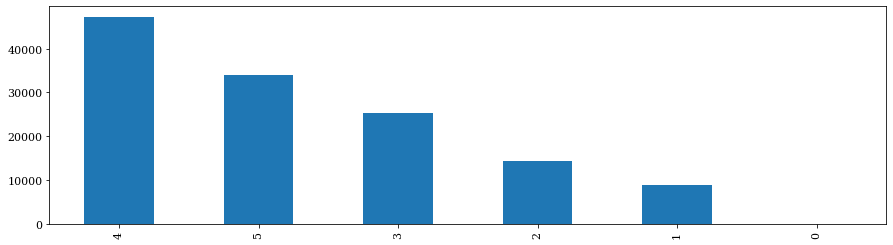

In [62]:
inflight_service_group = dataset.groupby(["inflight_service"])
dataset.inflight_service.value_counts().plot.bar()

<AxesSubplot:xlabel='inflight_service,satisfaction'>

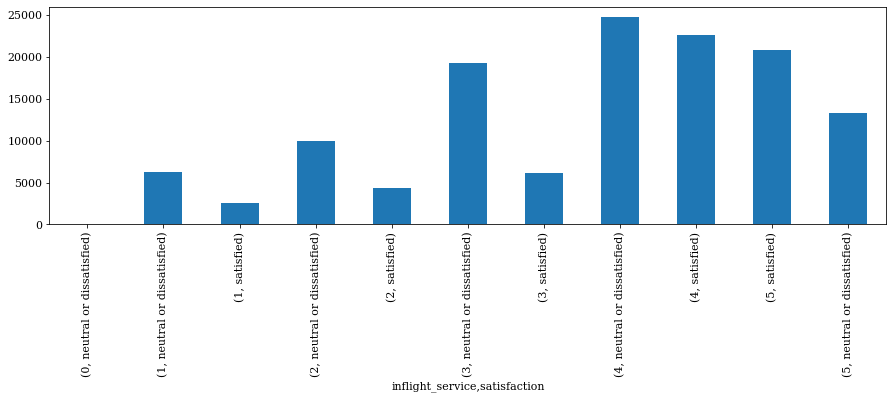

In [63]:
resultados_inflight_service = inflight_service_group["satisfaction"].value_counts()
resultados_inflight_service.plot.bar()